# Neural Network

In [134]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
# sets backend of matplotlib to appear inline
import math
import copy

training=np.loadtxt('Data_set.txt')

N=training.shape[0]

data= copy.deepcopy(training) # to deepcopy a list




# Activation Function

In [ ]:
# def ActFunction(,alpha):
# Define if needed as a separate function

# epochs / other parameters 

In [136]:
convergence=500
step_Output=0.01
step_Hidden=0.01

# Training the Net

weight randomized
epoch number : 0


epoch number : 100


epoch number : 200


epoch number : 300


epoch number : 400




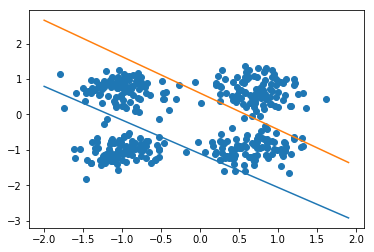

In [137]:

for epoch in range(0,convergence):
    
    
    # Shuffling the data to represent the data better
    np.random.shuffle(data)
    
    x=data[:,0:2] # input data    Rows = Samples ; Columns =Dimensions - N x d matrix
    d=data[:,2] # Desired values
    
    #Forward feed
    # Input(d=2) - Hidden layer(i=2)
    
    x_Input2Hidden=np.insert(x,2,1,axis=1) # N x d+1 matrix
        
    # For First epoch , first iteration
    if epoch==0:
        w_Input2Hidden=np.random.rand(2,3)   # form i x (d+1) matrix ; d=2 ,i=2
        w_Hidden2Output=np.random.rand(1,3)  # form j x (i+1) matrix ; j=1 ,i=2
        print('weight randomized')
    # End of weight initialize
    # Alpha value for logist activation function
    alpha=1

    
    for sample in range(0,N):
        
        #Forward Feed
        sum_HiddenLayer= w_Input2Hidden @ x_Input2Hidden[sample,:].T  # i x 1 matrix
        activation_HiddenLayer=( 1/ ( 1 + np.exp(-alpha * sum_HiddenLayer ))) # i x 1 matrix
        
        
        x_Hidden2Output = np.append(activation_HiddenLayer,1) # 1 x i+1 matrix
        sum_OutputLayer= w_Hidden2Output @ x_Hidden2Output
        activation_OutputLayer=( 1/ ( 1 + np.exp(-alpha * sum_OutputLayer ))) # Scalar
        
        y=activation_OutputLayer # Scalar
        
        error_atOutput=d[sample]-y # Scalar
        
        
        # Back Propagation
        
        # Output back to Hidden
        
        sigma_Differential_Output= activation_OutputLayer * (1-activation_OutputLayer) #Scalar
        del_Output= error_atOutput *-1* sigma_Differential_Output #Scalar
        
        w_Hidden2Output= w_Hidden2Output - step_Output * del_Output *x_Hidden2Output # 1 x i+1 matrix
        
        
        # Hidden Back to input
        
        sigma_Differential_Hidden= ( activation_HiddenLayer*(1 - activation_HiddenLayer))
        del_Hidden= (del_Output*w_Hidden2Output[0,0:2]) * sigma_Differential_Hidden # 1 x i matrix
        
        w_Input2Hidden = w_Input2Hidden - step_Hidden * del_Hidden.reshape(2,1) * x_Input2Hidden[sample,:]
        # 2 x 3 matrix = 2 x 3 matrix  - scalar.    * 2 x 1 matrix            *  1 x 3 matrix
        #print(w_Input2Hidden)
        
    if epoch%100 ==0:
        print('epoch number : ' + str(epoch))
        print('\n')
        

    

    
# Decision Lines

wline=w_Input2Hidden
axes=np.arange(-2,2,0.1)

line_1= -1*( wline[0,1]/wline[0,0] *axes + wline[0,2]/wline[0,0])
line_2= -1*( wline[1,1]/wline[1,0] *axes + wline[1,2]/wline[1,0])

plt.plot(axes,line_1)
plt.plot(axes,line_2)
plt.scatter(training[:,0],training[:,1])